In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import base64
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
url_base = 'https://tv.naver.com/'
url_sub = 'r'
url = url_base + url_sub

In [3]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [4]:
date = soup.select_one('.noti').get_text()
date

'11.19 오후 3시 ~ 오후 4시 기준 (재생수, 재생시간)'

In [5]:
week_date = ' '.join(date.split()[0:6])
week_date
# 기준 날짜

'11.19 오후 3시 ~ 오후 4시'

In [6]:
top_song_lists = soup.select_one('.rolling')

In [7]:
top_song_list = top_song_lists.select('.info')

In [8]:
song_lists = soup.select_one('.cds_area')

In [9]:
song_list = song_lists.select('.cds')

In [10]:
top_title = top_song_list[0].select_one('.tit').get_text()
top_title

"[11/18] '비매너 논란?' 9회 말, 권희동 타석 Full ver."

In [11]:
top_channel = top_song_list[0].select_one('.chn').get_text().strip()
top_channel

'크보연구소_네이버스포츠'

In [12]:
top_hit = top_song_list[0].select_one('.hit').get_text().replace('재생 수','').replace(',','')
top_hit

'193690'

In [13]:
top_like = top_song_list[0].select_one('.like').get_text().replace('좋아요 수','').replace(',','')
top_like

'344'

In [14]:
top_rank = top_song_list[0].select_one('.num').get_text()
top_rank

'1'

In [15]:
title = song_list[0].select_one('.title').get_text().strip()
title

'MBN 뉴스파이터-대체 복무에도 대체 불가한 김호중…왜?'

In [16]:
channel = song_list[0].select_one('.chn').get_text().strip()
channel

'MBN 뉴스'

In [17]:
hit = song_list[0].select_one('.hit').get_text().replace('재생 수','').replace(',','')
hit

'34011'

In [18]:
like = song_list[0].select_one('.like').get_text().replace('좋아요 수','').replace(',','')
like

'8073'

In [19]:
rank = song_list[0].select_one('.num').get_text()
rank

'4'

In [20]:
top_song_list[0].select_one('.num').get_text()

'1'

In [21]:
top_rank_list = []; top_channel_list = []; top_hit_list = []; top_like_list = []; top_title_list = []
for list in top_song_list:

    t_rank = int(list.select_one('.num').get_text())
    t_channel = list.select_one('.chn').get_text().strip()
    t_hit = int(list.select_one('.hit').get_text().replace('재생 수','').replace(',',''))
    t_like = int(list.select_one('.like').get_text().replace('좋아요 수','').replace(',',''))
    t_title = list.select_one('.title').get_text().strip()

    top_rank_list.append(t_rank)
    top_channel_list.append(t_channel)
    top_hit_list.append(t_hit)
    top_like_list.append(t_like)
    top_title_list.append(t_title)

In [22]:
df = pd.DataFrame({
    'Rank': top_rank_list,
    'Title': top_title_list,
    'Hit': top_hit_list,
    'Like': top_like_list,
    'Channel': top_channel_list
})
df.head()

,Rank,Title,Hit,Like,Channel
0,1,"[11/18] '비매너 논란?' 9회 말, 권희동 타석 Full ver.",193690,344,크보연구소_네이버스포츠
1,2,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,372370,27077,사랑의 콜센타
2,3,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,442711,21658,아무도 모르게 김호중의 파트너


In [23]:
rank_list = []; channel_list = []; hit_list = []; like_list = []; title_list = []
for list in song_list:

    rank = int(list.select_one('.num').get_text())
    channel = list.select_one('.chn').get_text().strip()
    hit = int(list.select_one('.hit').get_text().replace('재생 수','').replace(',',''))
    like = int(list.select_one('.like').get_text().replace('좋아요 수','').replace(',',''))
    title = list.select_one('.title').get_text().strip()

    rank_list.append(rank)
    channel_list.append(channel)
    hit_list.append(hit)
    like_list.append(like)
    title_list.append(title)

In [24]:
df2 = pd.DataFrame({
    'Rank': rank_list,
    'Title': title_list,
    'Hit': hit_list,
    'Like': like_list,
    'Channel': channel_list
})
df2.head()

,Rank,Title,Hit,Like,Channel
0,4,MBN 뉴스파이터-대체 복무에도 대체 불가한 김호중…왜?,34011,8073,MBN 뉴스
1,5,헨리가 부르는 'Radio' ♪♬,43605,1606,라디오스타
2,6,"[전체HL] '김재호 활약' 두산, 접전 끝에 NC 꺾고 승부 원점",133695,1040,KBO리그 NC 홈경기 영상
3,7,[Full] 개학 첫 날부터 선 넘네? [라이브온] - EP.01~02 (본 영상은...,171679,3161,플레이리스트 오리지널 PLAYLIST ORIGINALS
4,8,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,128602,10495,사랑의 콜센타


In [25]:
df.to_csv('top_song_list.csv')

In [26]:
df.to_csv('song_list.csv')

In [27]:
x = pd.concat([df, df2])
x

,Rank,Title,Hit,Like,Channel
0,1,"[11/18] '비매너 논란?' 9회 말, 권희동 타석 Full ver.",193690,344,크보연구소_네이버스포츠
1,2,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,372370,27077,사랑의 콜센타
2,3,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,442711,21658,아무도 모르게 김호중의 파트너
0,4,MBN 뉴스파이터-대체 복무에도 대체 불가한 김호중…왜?,34011,8073,MBN 뉴스
1,5,헨리가 부르는 'Radio' ♪♬,43605,1606,라디오스타
...,...,...,...,...,...
92,96,[가장빠른_현장직캠] 이것이 한국전력 신영석 효과!,5801,63,주간배구
93,97,한국 사람 다 된 헨리?! ＂제가 빽(?)이 없어서👉👈;;＂,27978,464,라디오스타
94,98,사상 초유 현직 검찰총장 감찰…秋-尹 갈등 심화,1187,1,채널A뉴스
95,99,풀세트 접전 끝에 KB손해보험을 꺾고 2연승 질주하는 한국전력,15166,116,프로배구 네이버스포츠


In [28]:
x.to_csv('top100_song_list1.csv',index=False)

In [57]:
top100_song_list1 = pd.read_csv('top100_song_list1.csv')
top100_song_list1.tail()

,Rank,Title,Hit,Like,Channel
95,96,[가장빠른_현장직캠] 이것이 한국전력 신영석 효과!,5801,63,주간배구
96,97,한국 사람 다 된 헨리?! ＂제가 빽(?)이 없어서👉👈;;＂,27978,464,라디오스타
97,98,사상 초유 현직 검찰총장 감찰…秋-尹 갈등 심화,1187,1,채널A뉴스
98,99,풀세트 접전 끝에 KB손해보험을 꺾고 2연승 질주하는 한국전력,15166,116,프로배구 네이버스포츠
99,100,강은탁 찾아온 엄현경의 오열＂왜 자꾸 거짓말하는 거야... 오빠라고 말 좀 해줘!＂,29351,186,비밀의 남자


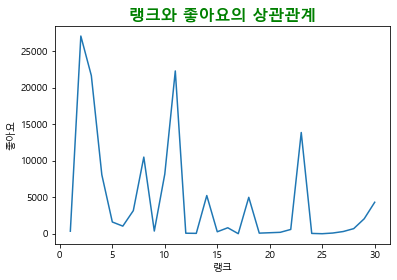

In [58]:
# 1위부터 30위 까지의 랭크 & 좋아요 사이의 그래프

a = []
b = []
for i in range(30):
    a.append(top100_song_list1['Rank'][i])
    b.append(top100_song_list1['Like'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요')
plt.title('랭크와 좋아요의 상관관계', fontdict=title_font)
plt.show()

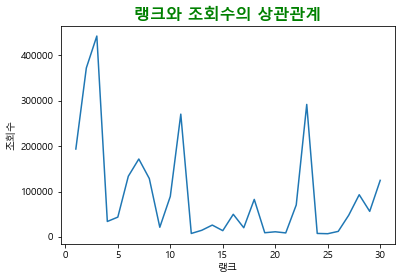

In [59]:
# 1위부터 30위 까지의 랭크 & 조회수 사이의 그래프
a = []
b = []
for i in range(30):
    a.append(top100_song_list1['Rank'][i])
    b.append(top100_song_list1['Hit'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('조회수')
plt.title('랭크와 조회수의 상관관계', fontdict=title_font)
plt.show()

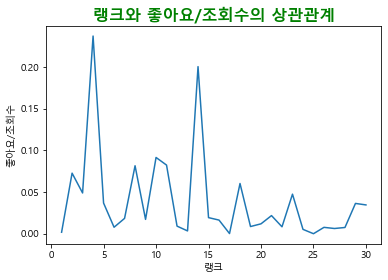

In [60]:
# 1위부터 30위 까지의 랭크 & 좋아요/조회수 사이의 그래프
a = []
b = []
for i in range(30):
    a.append(top100_song_list1['Rank'][i])
    b.append(top100_song_list1['Like'][i]/top100_song_list1['Hit'][i])
plt.plot(a, b)

title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요/조회수')
plt.title('랭크와 좋아요/조회수의 상관관계', fontdict=title_font)
plt.show()

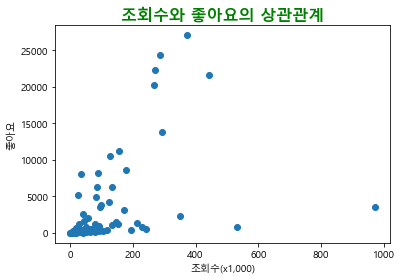

In [61]:
plt.scatter(top100_song_list1['Hit']/1000, top100_song_list1['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('조회수(x1,000)')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

In [77]:
# 위의 산점도 그래프가 2방향으로 나뉘기 때문에 크게 벗어난 데이터 갯수를 세어 표본으로 하여 그래프를 다시 그림
like_sort = top100_song_list1.sort_values(by='Like', ascending=False)
hit_sort = top100_song_list1.sort_values(by='Hit', ascending=False)

In [98]:
like_sort_top5 = like_sort['Like'].head(5) # like 기준으로 내림차순 like 상위 5개
like_sort_top5_hit = like_sort['Hit'].head(5) # like 기준으로 내림차순 hit 상위 5개
hit_sort_top2 = hit_sort['Hit'].head(2) # hit 기준으로 내림차순 hit 상위 3개
hit_sort_top2_like = hit_sort['Like'].head(2) # hit 기준으로 내림차순 like 상위 3개

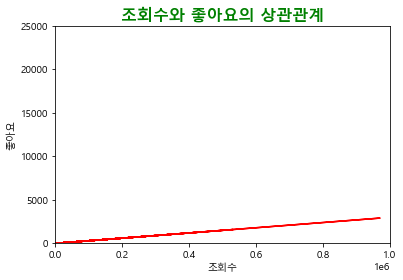

In [99]:
# hit를 기준으로 상위 3개 그래프
plt.plot(top100_song_list1['Hit'], top100_song_list1['Hit'] * (hit_sort_top2_like.mean()/hit_sort_top2.mean()), 'r')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

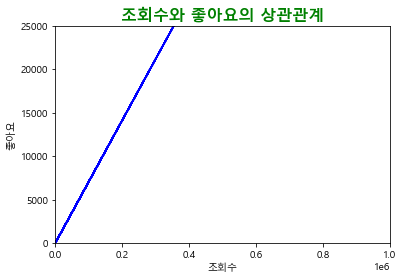

In [76]:
# like를 기준으로 상위 5개 그래프
plt.plot(top100_song_list1['Hit'], top100_song_list1['Hit'] * (like_sort_top5.mean()/like_sort_top5_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

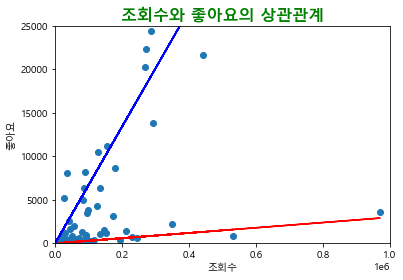

In [100]:
plt.scatter(top100_song_list1['Hit'], top100_song_list1['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.plot(top100_song_list1['Hit'], top100_song_list1['Hit'] * (hit_sort_top2_like.mean()/hit_sort_top2.mean()), 'r')
plt.plot(top100_song_list1['Hit'], top100_song_list1['Hit'] * (like_sort_top6.mean()/like_sort_top6_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

In [90]:
x = (top100_song_list1['Like']/top100_song_list1['Hit']).sort_values(ascending=False)
x.head(6)
# top5 는 0.082이상으로 결정

3     0.237364
13    0.200629
9     0.091574
69    0.085416
10    0.082396
7     0.081608
dtype: float64

In [91]:
y = (top100_song_list1['Like']/top100_song_list1['Hit']).sort_values()
y.head(8)
# bottom5는 0.0002 이하로 결정 - 위의 2개 자료는 분자값이 0이므로 분석에서 제외

92    0.000000
24    0.000000
75    0.000101
81    0.000151
79    0.000175
16    0.000198
52    0.000198
43    0.000218
dtype: float64

In [93]:
top5_list = []
for i in range(len(top100_song_list1)):
    x = top100_song_list1['Like'][i]/top100_song_list1['Hit'][i]
    if  x > 0.082:
        top5_list.append(top100_song_list1['Title'][i])

bottom5_list = []
for i in range(len(top100_song_list1)):
    x = top100_song_list1['Like'][i]/top100_song_list1['Hit'][i]
    if   x < 0.0002:
        bottom5_list.append(top100_song_list1['Title'][i])

In [94]:
top5_list

['MBN 뉴스파이터-대체 복무에도 대체 불가한 김호중…왜?',
 '‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..',
 '임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥',
 '당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip',
 '‘Beautiful’♪ 전주부터 차오르는 감성 영웅♥']

In [96]:
bottom5_list[2:]

['113년 만의 11월 폭우…내일부터 본격 겨울추위',
 '어제 신규 확진 343명..."거리두기 추가 격상 검토"',
 '추미애, 윤석열 대면 감찰조사 강행…“오후 2시 간다”',
 '[날씨] 때 아닌 가을폭우…낮부터 충북·남부 비 집중',
 "[날씨] 남부 벼락 동반 국지 호우...비 그친 뒤 기온 '뚝'"]

### 결과 : 2일차 역시 산점도 그래프에서 기울기가 클수록(조회수 별 좋아요가 많을 경우) 가요프로그램이 많았고, 기울기가 낮을수록(조회수 별 좋아요가 적을 경우) 뉴스쪽 영상이 많았다.